In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'L1-4', 'L1.4T', 'FN',
       'FNT', 'TL', 'TLT', 'ALT', 'AST', 'BUN', 'CREA', 'URIC', 'FBG', 'HDL-C',
       'LDL-C', 'Ca', 'P', 'Mg', 'Calsium', 'Calcitriol', 'Bisphosphonate',
       'Calcitonin', 'HTN', 'COPD', 'DM', 'Hyperlipidaemia', 'Hyperuricemia',
       'AS', 'VT', 'VD', 'OP', 'CAD', 'CKD', 'Fracture', 'Smoking',
       'Drinking'],
      dtype='object')

In [4]:
df.drop(['Height', 'Weight','L1-4','ALT', 'AST', 'BUN', 'CREA', 'URIC', 'FBG', 'HDL-C',
       'LDL-C', 'P', 'Mg', 'Calsium','Bisphosphonate',
       'Calcitonin', 'HTN', 'COPD', 'DM', 'Hyperlipidaemia', 'Hyperuricemia',
       'AS', 'VT', 'VD','CAD', 'CKD'],axis=1,inplace=True)

In [5]:
df.columns

Index(['Gender', 'Age', 'BMI', 'L1.4T', 'FN', 'FNT', 'TL', 'TLT', 'Ca',
       'Calcitriol', 'OP', 'Fracture', 'Smoking', 'Drinking'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1537 non-null   int64  
 1   Age         1501 non-null   float64
 2   BMI         1503 non-null   float64
 3   L1.4T       1537 non-null   float64
 4   FN          1537 non-null   float64
 5   FNT         1537 non-null   float64
 6   TL          1537 non-null   float64
 7   TLT         1537 non-null   float64
 8   Ca          1535 non-null   float64
 9   Calcitriol  1537 non-null   int64  
 10  OP          1537 non-null   int64  
 11  Fracture    1537 non-null   int64  
 12  Smoking     1537 non-null   int64  
 13  Drinking    1537 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 168.2 KB


In [7]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.isnull().sum()

Gender         0
Age           36
BMI           34
L1.4T          0
FN             0
FNT            0
TL             0
TLT            0
Ca             2
Calcitriol     0
OP             0
Fracture       0
Smoking        0
Drinking       0
dtype: int64

In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
df.head()

,Gender,Age,BMI,L1.4T,FN,FNT,TL,TLT,Ca,Calcitriol,OP,Fracture,Smoking,Drinking
0,2,61.9,17.474717,-2.4,0.6895,-2.95,0.7130,-2.90,2.15,1,1,0,1,0
1,2,55.0,20.576132,1.3,0.9130,-1.30,1.0675,-0.15,2.15,0,1,0,0,0
2,2,44.0,21.093750,-0.2,0.5190,-3.85,0.5770,-3.55,2.18,1,1,0,0,0
3,1,64.7,23.634033,-2.3,0.7920,-2.15,0.9050,-1.40,2.35,0,1,0,1,1
4,1,88.5,21.513859,-0.9,0.8250,-1.90,0.9385,-1.15,1.98,1,1,0,1,0


In [11]:
df['Gender'].value_counts()

Gender
1    945
2    592
Name: count, dtype: int64

In [12]:
df.isnull().sum()

Gender        0
Age           0
BMI           0
L1.4T         0
FN            0
FNT           0
TL            0
TLT           0
Ca            0
Calcitriol    0
OP            0
Fracture      0
Smoking       0
Drinking      0
dtype: int64

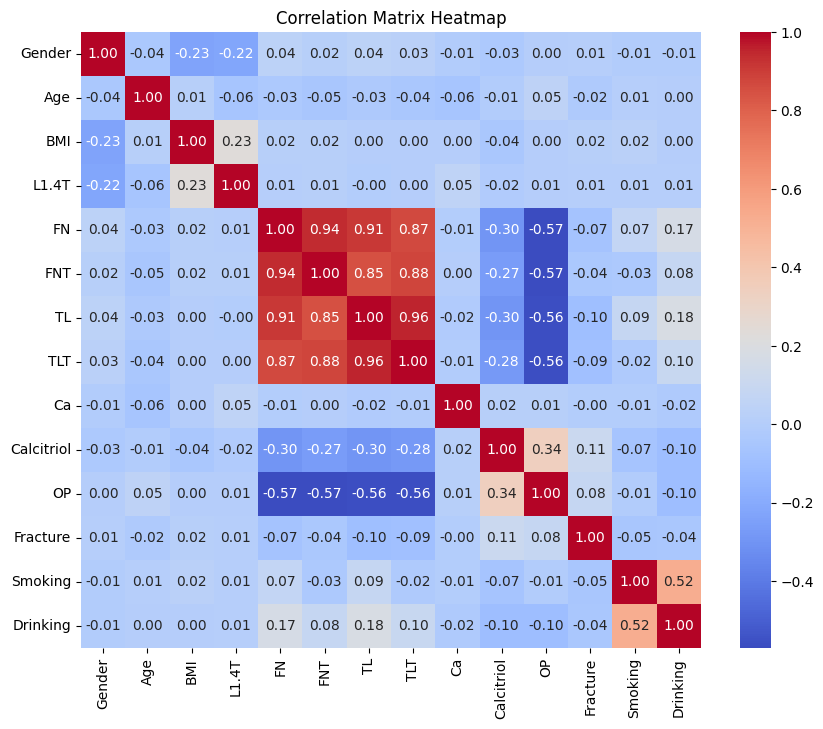

In [13]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

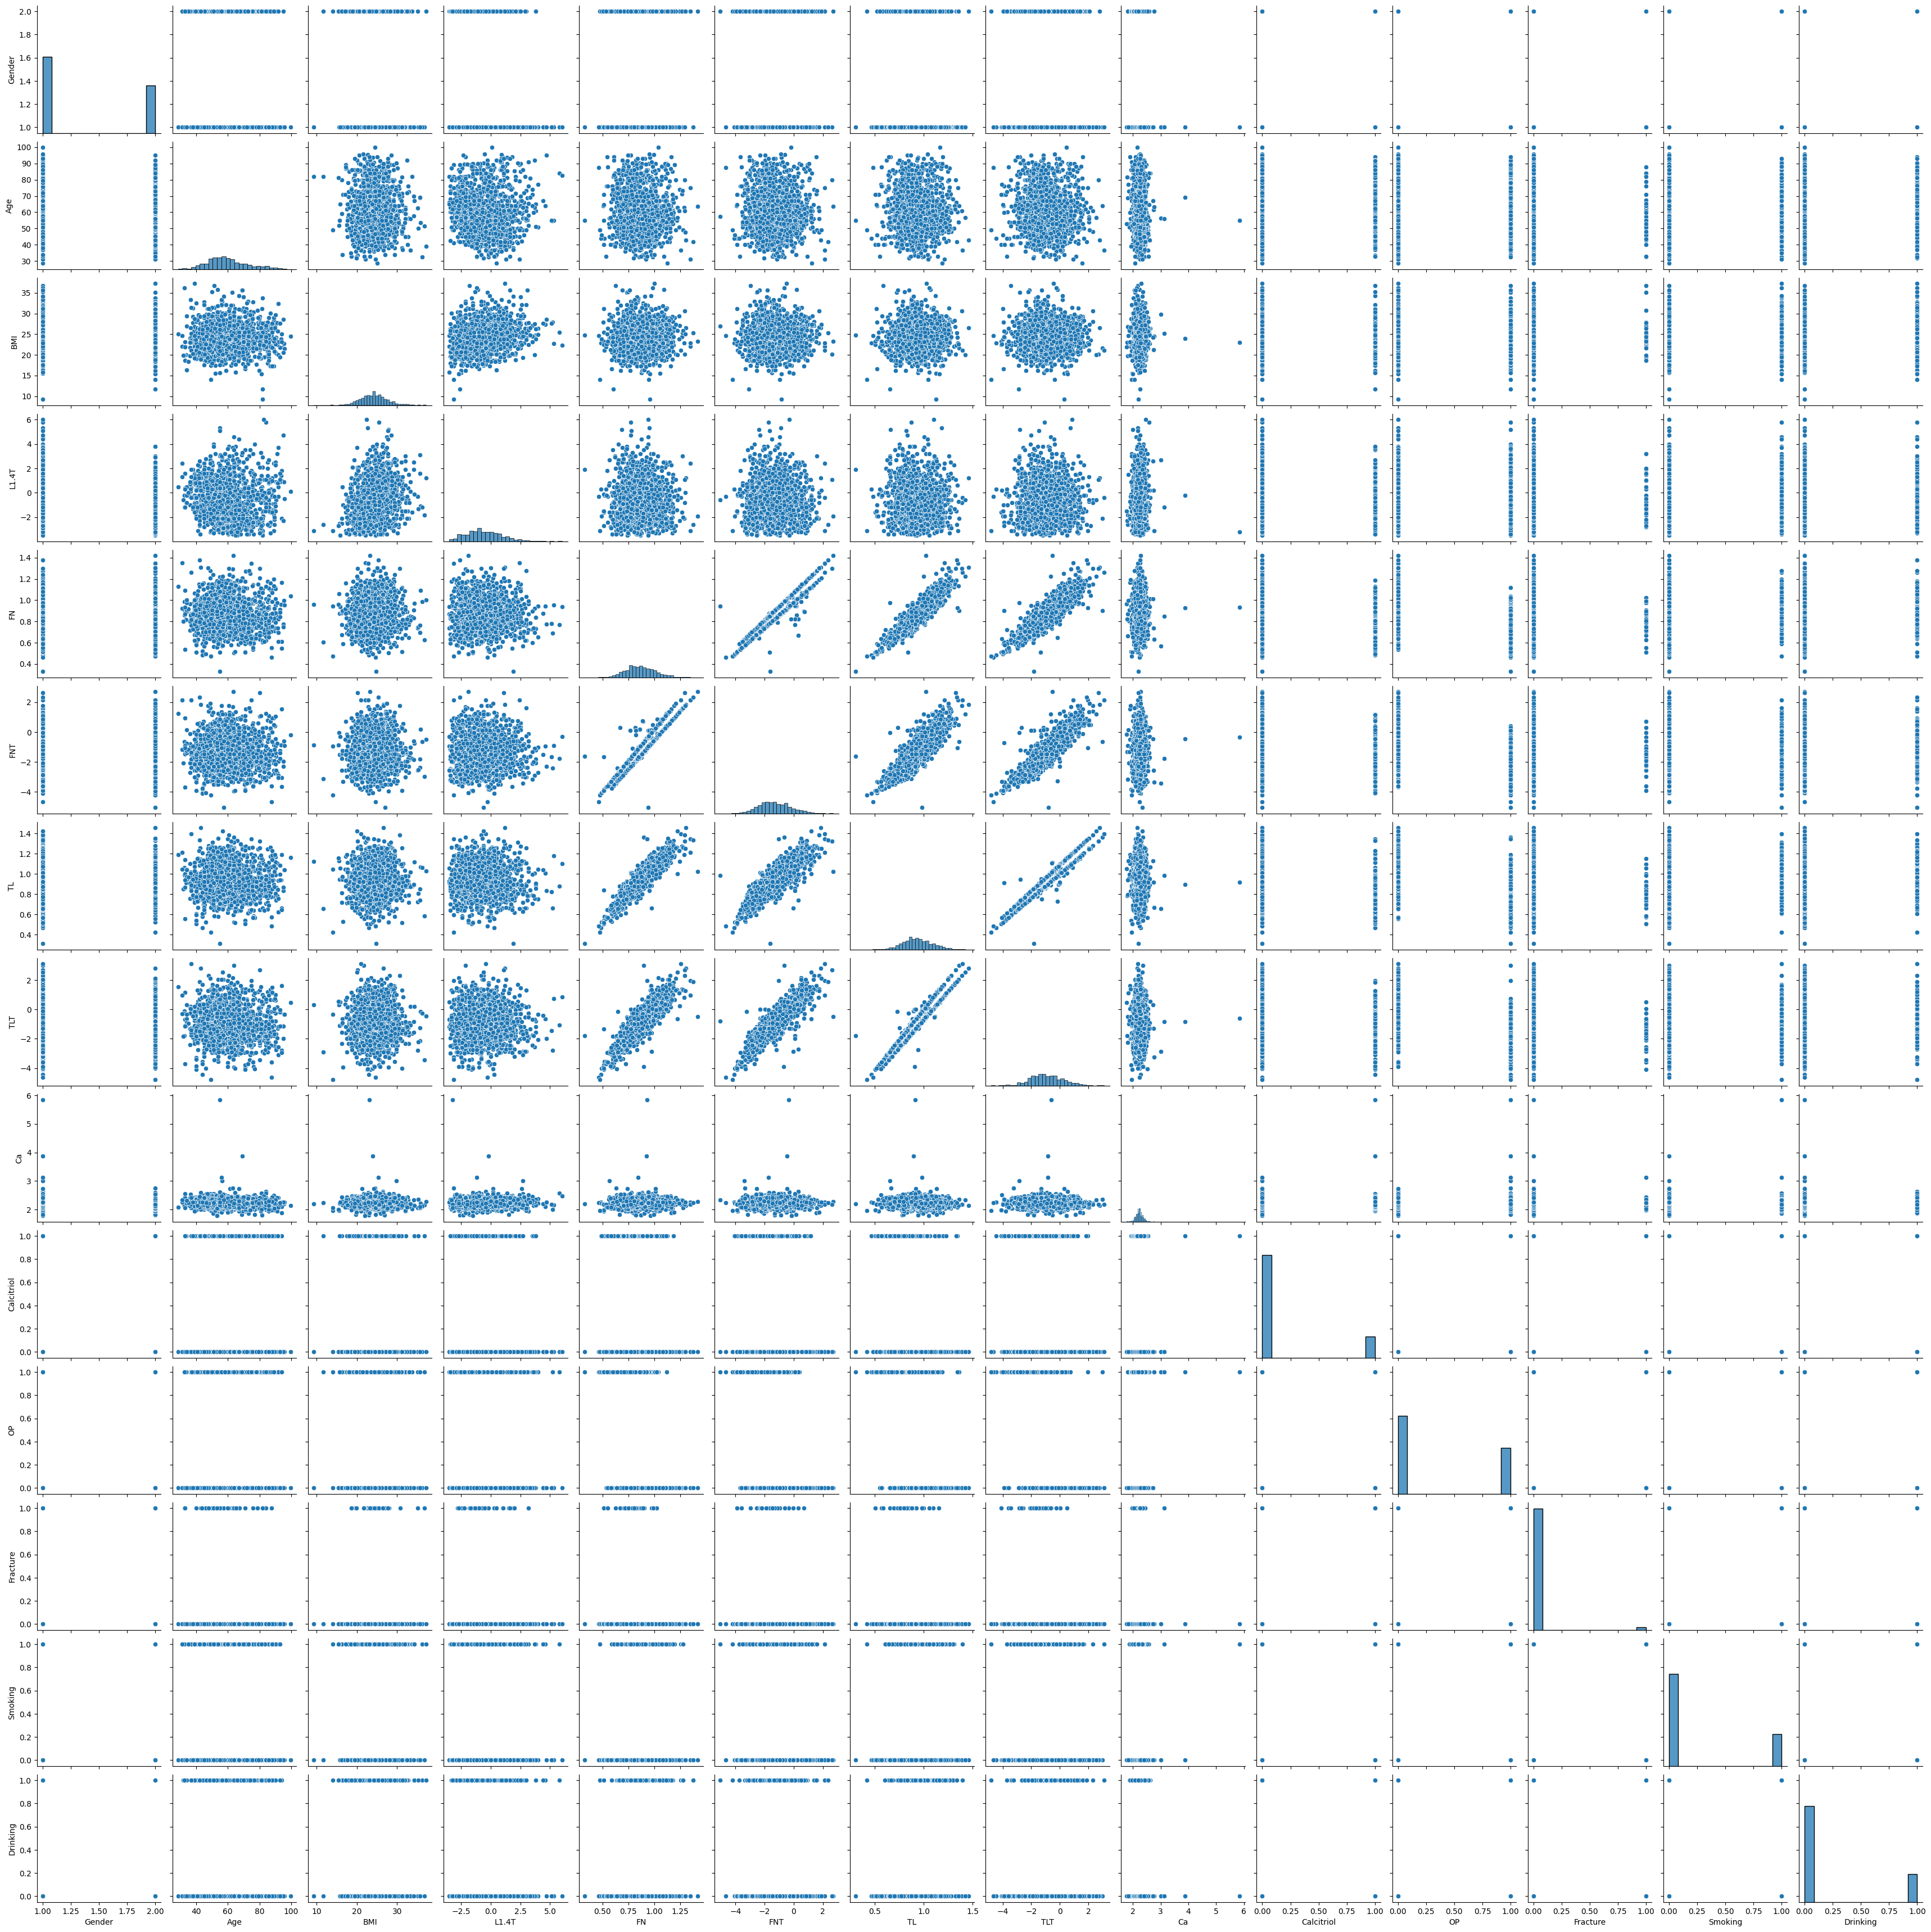

In [14]:
sns.pairplot(df)
plt.show()


In [15]:
df.columns

Index(['Gender', 'Age', 'BMI', 'L1.4T', 'FN', 'FNT', 'TL', 'TLT', 'Ca',
       'Calcitriol', 'OP', 'Fracture', 'Smoking', 'Drinking'],
      dtype='object')

In [16]:
X=df[['Gender', 'Age', 'BMI','FN', 'FNT', 'TL', 'TLT', 'Ca',
       'Calcitriol', 'OP', 'Fracture', 'Smoking', 'Drinking']]
y=df['L1.4T']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [19]:
import numpy as np

# Define bins for categorization (adjust thresholds as needed)
bins = [-np.inf, -2.5, -1, np.inf]
labels = ['Osteoporosis', 'Osteopenia', 'Normal']

# Convert continuous target to categorical
y_train = pd.cut(y_train, bins=bins, labels=labels)
y_test = pd.cut(y_test, bins=bins, labels=labels)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [21]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  
# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

models = {
    "Logistic Regression":LogisticRegression(),
    "Decision tree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train_encoded)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get probabilities for ROC-AUC
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Metrics for training set
    model_train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    model_train_f1 = f1_score(y_train_encoded, y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train_encoded, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train_encoded, y_train_pred, average="weighted")
    model_train_rocauc_score = roc_auc_score(y_train_encoded, y_train_prob, multi_class="ovr")

    # Metrics for test set
    model_test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
    model_test_f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
    model_test_recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
    model_test_rocauc_score = roc_auc_score(y_test_encoded, y_test_prob, multi_class="ovr")

    # Print results
    print(list(models.keys())[i])
    print('\n\nModel performance for training set')
    print(f'Accuracy score : {model_train_accuracy:.4f}')
    print(f'F1 score : {model_train_f1:.4f}')
    print(f'Precision score : {model_train_precision:.4f}')
    print(f'Recall score : {model_train_recall:.4f}')
    print(f'ROC-AUC score : {model_train_rocauc_score:.4f}\n\n')

    print('Model performance for test set')
    print(f'Accuracy score : {model_test_accuracy:.4f}')
    print(f'F1 score : {model_test_f1:.4f}')
    print(f'Precision score : {model_test_precision:.4f}')
    print(f'Recall score : {model_test_recall:.4f}')
    print(f'ROC-AUC score : {model_test_rocauc_score:.4f}')
    print('-----------------------------------------')


d:\code\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression


Model performance for training set
Accuracy score : 0.5907
F1 score : 0.5110
Precision score : 0.5532
Recall score : 0.5907
ROC-AUC score : 0.6596


Model performance for test set
Accuracy score : 0.5909
F1 score : 0.5016
Precision score : 0.5272
Recall score : 0.5909
ROC-AUC score : 0.6210
-----------------------------------------
Decision tree


Model performance for training set
Accuracy score : 1.0000
F1 score : 1.0000
Precision score : 1.0000
Recall score : 1.0000
ROC-AUC score : 1.0000


Model performance for test set
Accuracy score : 0.4968
F1 score : 0.4960
Precision score : 0.4952
Recall score : 0.4968
ROC-AUC score : 0.5328
-----------------------------------------
Random Forest


Model performance for training set
Accuracy score : 1.0000
F1 score : 1.0000
Precision score : 1.0000
Recall score : 1.0000
ROC-AUC score : 1.0000


Model performance for test set
Accuracy score : 0.5844
F1 score : 0.5449
Precision score : 0.5517
Recall score : 0.5844
ROC-AUC s

d:\code\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:55:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost


Model performance for training set
Accuracy score : 1.0000
F1 score : 1.0000
Precision score : 1.0000
Recall score : 1.0000
ROC-AUC score : 1.0000


Model performance for test set
Accuracy score : 0.5649
F1 score : 0.5352
Precision score : 0.5274
Recall score : 0.5649
ROC-AUC score : 0.6277
-----------------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 1229, number of used features: 13
[LightGBM] [Info] Start training from score -0.552925
[LightGBM] [Info] Start training from score -1.142694
[LightGBM] [Info] Start training from score -2.246422
LightGBM


Model performance for training set
Accuracy score : 1.0000
F1 score : 1.0000
Precision score : 1.0000
Recall score : 1.0000
ROC-AUC

In [22]:
rf_params={
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [23]:
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
]

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid for Random Forest
rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000],
}

# Model to tune
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
]

# Dictionary to store the best parameters
model_param = {}

# Perform RandomizedSearchCV for each model in the list
for name, model, params in randomcv_models:
    print(f"Tuning hyperparameters for {name}...")
    random = RandomizedSearchCV(
        estimator=model,  # Pass the model directly
        param_distributions=params,
        n_iter=100,  # Number of random samples
        cv=3,  # 3-fold cross-validation
        verbose=2,  # Verbosity level
        n_jobs=-1  # Use all processors
    )
    random.fit(X_train, y_train_encoded)  # Ensure encoded targets are used
    model_param[name] = random.best_params_  # Save the best parameters

# Print the best parameters for each model
for model_name in model_param:
    print(f"Best parameters for {model_name}:")
    print(model_param[model_name])


Tuning hyperparameters for RF...
Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\code\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\code\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\code\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\code\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\code\venv\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

Best parameters for RF:
{'n_estimators': 1000, 'min_samples_split': 15, 'max_features': 5, 'max_depth': 5}


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

models = {
    
    "Random Forest": RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_features=7,max_depth= 15)
     
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train_encoded)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get probabilities for ROC-AUC
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Metrics for training set
    model_train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    model_train_f1 = f1_score(y_train_encoded, y_train_pred, average="weighted")
    model_train_precision = precision_score(y_train_encoded, y_train_pred, average="weighted")
    model_train_recall = recall_score(y_train_encoded, y_train_pred, average="weighted")
    model_train_rocauc_score = roc_auc_score(y_train_encoded, y_train_prob, multi_class="ovr")

    # Metrics for test set
    model_test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
    model_test_f1 = f1_score(y_test_encoded, y_test_pred, average="weighted")
    model_test_precision = precision_score(y_test_encoded, y_test_pred, average="weighted")
    model_test_recall = recall_score(y_test_encoded, y_test_pred, average="weighted")
    model_test_rocauc_score = roc_auc_score(y_test_encoded, y_test_prob, multi_class="ovr")

    # Print results
    print(list(models.keys())[i])
    print('\n\nModel performance for training set')
    print(f'Accuracy score : {model_train_accuracy:.4f}')
    print(f'F1 score : {model_train_f1:.4f}')
    print(f'Precision score : {model_train_precision:.4f}')
    print(f'Recall score : {model_train_recall:.4f}')
    print(f'ROC-AUC score : {model_train_rocauc_score:.4f}\n\n')

    print('Model performance for test set')
    print(f'Accuracy score : {model_test_accuracy:.4f}')
    print(f'F1 score : {model_test_f1:.4f}')
    print(f'Precision score : {model_test_precision:.4f}')
    print(f'Recall score : {model_test_recall:.4f}')
    print(f'ROC-AUC score : {model_test_rocauc_score:.4f}')
    print('-----------------------------------------')


Random Forest


Model performance for training set
Accuracy score : 1.0000
F1 score : 1.0000
Precision score : 1.0000
Recall score : 1.0000
ROC-AUC score : 1.0000


Model performance for test set
Accuracy score : 0.5844
F1 score : 0.5472
Precision score : 0.5486
Recall score : 0.5844
ROC-AUC score : 0.6262
-----------------------------------------


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Step 1: Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Step 2: Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', RandomForestClassifier())
])

# Step 3: Define hyperparameters for the pipeline
param_grid = {
    'classifier__n_estimators': [500, 1000],  # Number of trees
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': [7, 'auto'],
    'classifier__max_depth': [10, 15, None]
}

# Step 4: Fit the pipeline
pipeline.fit(X_train, y_train_encoded)

# Step 5: Make predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model
def evaluate_model(y_true, y_pred, y_prob, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="weighted")
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_true, y_prob, multi_class="ovr")

    print(f'\nModel performance for {dataset_name} set')
    print(f'Accuracy score : {accuracy:.4f}')
    print(f'F1 score : {f1:.4f}')
    print(f'Precision score : {precision:.4f}')
    print(f'Recall score : {recall:.4f}')
    print(f'ROC-AUC score : {roc_auc:.4f}\n')
    print('-----------------------------------------')

# Probabilities for ROC-AUC
y_train_prob = pipeline.predict_proba(X_train)
y_test_prob = pipeline.predict_proba(X_test)

# Evaluate for training and test sets
evaluate_model(y_train_encoded, y_train_pred, y_train_prob, "training")
evaluate_model(y_test_encoded, y_test_pred, y_test_prob, "test")



Model performance for training set
Accuracy score : 1.0000
F1 score : 1.0000
Precision score : 1.0000
Recall score : 1.0000
ROC-AUC score : 1.0000

-----------------------------------------

Model performance for test set
Accuracy score : 0.5844
F1 score : 0.5471
Precision score : 0.5468
Recall score : 0.5844
ROC-AUC score : 0.6479

-----------------------------------------


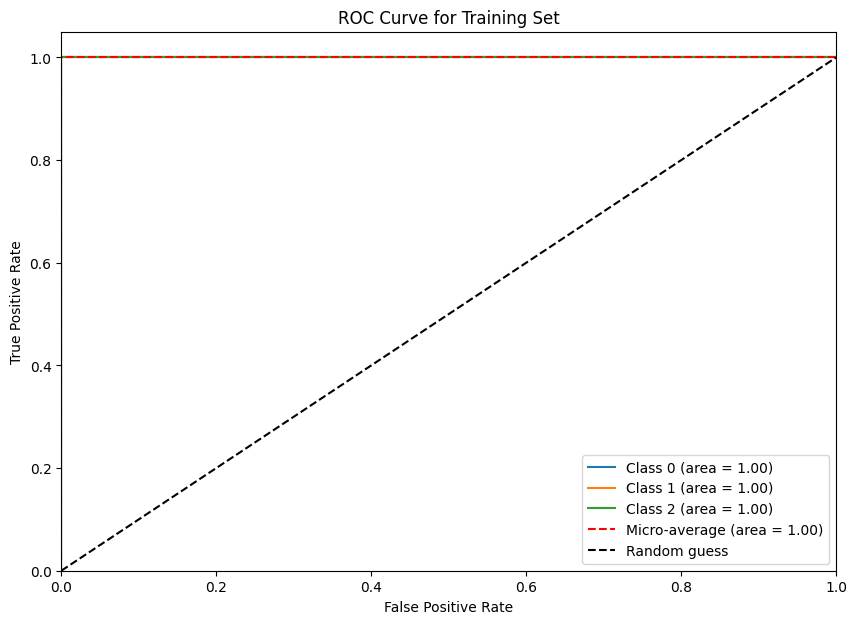

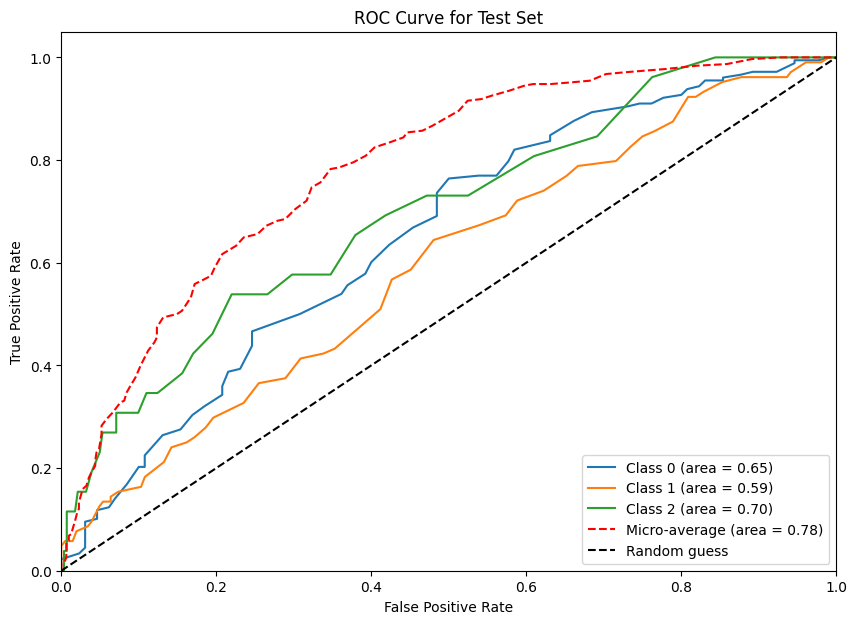

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output for multi-class ROC curve
y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
n_classes = y_train_binarized.shape[1]

# Compute ROC curve and ROC area for each class for training set
fpr_train = {}
tpr_train = {}
roc_auc_train = {}

for i in range(n_classes):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_binarized[:, i], y_train_prob[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Compute micro-average ROC curve and ROC area for training set
fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_train_binarized.ravel(), y_train_prob.ravel())
roc_auc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

# Plot ROC curve for training set
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr_train[i], tpr_train[i], label=f'Class {i} (area = {roc_auc_train[i]:.2f})')

plt.plot(fpr_train["micro"], tpr_train["micro"], label=f'Micro-average (area = {roc_auc_train["micro"]:.2f})', linestyle='--', color='red')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set')
plt.legend(loc="lower right")
plt.show()

# Repeat the process for the test set
fpr_test = {}
tpr_test = {}
roc_auc_test = {}

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarized[:, i], y_test_prob[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test_binarized.ravel(), y_test_prob.ravel())
roc_auc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

# Plot ROC curve for test set
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], label=f'Class {i} (area = {roc_auc_test[i]:.2f})')

plt.plot(fpr_test["micro"], tpr_test["micro"], label=f'Micro-average (area = {roc_auc_test["micro"]:.2f})', linestyle='--', color='red')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")
plt.show()


In [28]:
import pickle

# Save the pipeline as a pickle file
pickle_file = "ml_pipeline.pkl"
with open(pickle_file, 'wb') as file:
    pickle.dump(pipeline, file)

print(f"Pipeline saved to {pickle_file}")

# Load the pipeline
with open(pickle_file, 'rb') as file:
    loaded_pipeline = pickle.load(file)

print("Pipeline loaded successfully")

# Test the loaded pipeline
y_test_pred_loaded = loaded_pipeline.predict(X_test)
y_test_prob_loaded = loaded_pipeline.predict_proba(X_test)

# Evaluate the loaded pipeline
evaluate_model(y_test_encoded, y_test_pred_loaded, y_test_prob_loaded, "test (loaded pipeline)")


Pipeline saved to ml_pipeline.pkl
Pipeline loaded successfully

Model performance for test (loaded pipeline) set
Accuracy score : 0.5844
F1 score : 0.5471
Precision score : 0.5468
Recall score : 0.5844
ROC-AUC score : 0.6479

-----------------------------------------


In [29]:
import pandas as pd

cleaned_dataset = pd.DataFrame(X_train, columns=['Gender', 'Age', 'BMI', 'FN', 'FNT', 'TL', 'TLT', 'Ca', 'Calcitriol',
       'OP', 'Fracture', 'Smoking', 'Drinking']) 
cleaned_dataset['L1.4T'] = y_train_encoded  

# Save to CSV
cleaned_dataset.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


In [398]:
X_train.head()

,Gender,Age,BMI,FN,FNT,TL,TLT,Ca,Calcitriol,OP,Fracture,Smoking,Drinking
845,2,64.0,26.346494,0.9105,-1.25,0.9620,-0.95,2.16,0,0,0,1,0
1346,2,56.0,22.761468,0.8705,-0.90,0.8715,-1.10,2.33,0,0,0,0,0
81,2,71.3,24.341758,0.7720,-2.25,0.8705,-1.70,2.27,0,1,0,0,0
1438,1,55.9,21.049818,1.1410,1.35,1.2455,2.05,2.20,0,0,0,0,0
374,2,66.1,27.053803,0.6390,-2.80,0.7020,-2.45,2.17,0,1,0,0,0


In [30]:
# Load the pipeline
with open('ml_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

print("Pipeline loaded successfully!")


Pipeline loaded successfully!


In [31]:
import pandas as pd

# Define feature names (ensure these match the training data columns)
feature_names = [
    'Gender', 'Age', 'BMI', 'FN', 'FNT', 'TL', 'TLT', 
    'Ca', 'Calcitriol', 'OP', 'Fracture', 'Smoking', 'Drinking'
]

# Correct the input_data structure as a 2D list
input_data = [[1, 75, 17.0, 0.3, -3.5, 0.4, -3.4, 1.5, 1, 1, 1, 1, 0]]

# Wrap input_data in a DataFrame
input_df = pd.DataFrame(input_data, columns=feature_names)

# Predict using the pipeline
prediction = loaded_pipeline.predict(input_df)

# Decode the label if LabelEncoder was used
predicted_label = le.inverse_transform(prediction)

print(f"Predicted Class: {predicted_label[0]}")

# Get prediction probabilities
probabilities = loaded_pipeline.predict_proba(input_df)
print(f"Prediction Probabilities: {probabilities}")


Predicted Class: Osteopenia
Prediction Probabilities: [[0.4  0.45 0.15]]


In [32]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Create and fit the label encoder
le = LabelEncoder()
le.fit(y_train)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
